In [11]:
from yahoofinancials import YahooFinancials
import yahoo_fin.stock_info as si
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

#Info for Multiple Tickers
tickers_list = "AAPL",

 
# Get data in the current column for each stock's valuation table
stock_stats = {}
for ticker in tickers_list:
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Recent"]
 
    stock_stats[ticker] = temp
 
 
# combine all the stats valuation tables into a single data frame
combined_stats = pd.concat(stock_stats)
combined_stats = combined_stats.reset_index()
 
del combined_stats["level_1"]
 
# update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]


stock_extra_stats = {}
for ticker in tickers_list:
    stock_extra_stats[ticker] = si.get_stats(ticker)
     

combined_extra_stats = pd.concat(stock_extra_stats)
 
combined_extra_stats = combined_extra_stats.reset_index()
 
del combined_extra_stats["level_1"]
 
combined_extra_stats.columns = ["ticker", "Attribute", "Value"]

In [12]:
# To pull Individual Values from above list
#Available Commands
Trailing_PE = ("Trailing P/E")
P_S = ("Price/Sales")
P_B = ("Price/Book")
PEG = ("PEG") #(Price/Earnings to Growth Ratio)
Forward_PE = ("Forward P/E")
Market_Cap = ("Market Cap")
EV_REV = ("Enterprise Value/Revenue")
EV_EBITDA = ("Enterprise Value/EBITDA")
# - To pull above info use: combined_stats[combined_stats.Attribute.str.contains(COMMAND)] 
# - COMMAND is one of the above listed commands, ex Trailing_PE


# The following need to be pulled from a different line
ROE = ("Return on Equity")
ROA = ("Return on Assets")
Profit_Margin = ("Profit Margin")
#To pull above use: combined_extra_stats[combined_extra_stats.Attribute.str.contains(COMMAND)]
# - COMMAND is one of the above listed commands, ex ROE

#combined_stats[combined_stats.Attribute.str.contains(Forward_PE)]
#combined_extra_stats[combined_extra_stats.Attribute.str.contains("Profit Margin")]


In [13]:
# NOTE*** ONLY PULLS THE LAST TICKER IN LIST

# Current Ratio Analyis
balance_sheet = si.get_balance_sheet(ticker)
income_statement = si.get_income_statement(ticker)

#Time T
Year_1_CR = balance_sheet.loc["totalCurrentAssets"][0] / balance_sheet.loc["totalCurrentLiabilities"][0]
# Time T-1
Year_2_CR = balance_sheet.loc["totalCurrentAssets"][1] / balance_sheet.loc["totalCurrentLiabilities"][1]
#Time T-2
Year_3_CR = balance_sheet.loc["totalCurrentAssets"][2] / balance_sheet.loc["totalCurrentLiabilities"][2]
#Time T-3
Year_4_CR = balance_sheet.loc["totalCurrentAssets"][3] / balance_sheet.loc["totalCurrentLiabilities"][3]

#Columns
col_1 = balance_sheet.columns[3]
col_1 = (str(col_1))
col_2 = balance_sheet.columns[2]
col_2 = str(col_2)
col_3 = balance_sheet.columns[1]
col_3 = str(col_3)
col_4 = balance_sheet.columns[0]
col_4 = str(col_4)

In [14]:
#STOCK PROFILE CALCULATIONS

#DUMMIES
PE_Test = "Following"
if float(combined_stats["Recent"].loc[3]) > float(combined_stats["Recent"].loc[2]):
    PE_Test = "Earnings expected to Shrink"
else:
    PE_Test = "Earnings expected to Grow"

#EBIT
# Time T
Year_1_EBIT = float(income_statement.loc["ebit"][0])

# Time T-1
Year_2_EBIT = float(income_statement.loc["ebit"][1])

#Time T-2
Year_3_EBIT = float(income_statement.loc["ebit"][2])

#Time T-3
Year_4_EBIT = float(income_statement.loc["ebit"][3])


#EBIT Growth
Year_One_EBIT_Growth = ((Year_1_EBIT / Year_2_EBIT)-1)

Year_Two_EBIT_Growth = ((Year_2_EBIT / Year_3_EBIT)-1)

Year_Three_EBIT_Growth = ((Year_3_EBIT / Year_4_EBIT)-1)

Average_EBIT_Growth = 100*(((Year_1_EBIT / Year_4_EBIT)**(1/3))-1)
Max_EBIT_Growth = max(Year_One_EBIT_Growth, Year_Two_EBIT_Growth, Year_Three_EBIT_Growth)
Min_EBIT_Growth = min(Year_One_EBIT_Growth, Year_Two_EBIT_Growth, Year_Three_EBIT_Growth)

EBITS = [Year_One_EBIT_Growth, Year_Two_EBIT_Growth, Year_Three_EBIT_Growth]

EBIT_Variance = np.var(EBITS)

#NET INCOME
Year_1_NI = float(income_statement.loc["netIncome"][0])

# Time T-1
Year_2_NI = float(income_statement.loc["netIncome"][1])

#Time T-2
Year_3_NI = float(income_statement.loc["netIncome"][2])

#Time T-3
Year_4_NI = float(income_statement.loc["netIncome"][3])


#NI Growth
Year_One_NI_Growth = ((Year_1_NI / Year_2_NI)-1)

Year_Two_NI_Growth = ((Year_2_NI / Year_3_NI)-1)

Year_Three_NI_Growth = ((Year_3_NI / Year_4_NI)-1)

Average_NI_Growth = 100*(((Year_1_NI / Year_4_NI)**(1/3))-1)
Max_NI_Growth = max(Year_One_NI_Growth, Year_Two_NI_Growth, Year_Three_NI_Growth)
Min_NI_Growth = min(Year_One_NI_Growth, Year_Two_NI_Growth, Year_Three_NI_Growth)

NIS = [Year_One_NI_Growth, Year_Two_NI_Growth, Year_Three_NI_Growth]

NIS_Variance = np.var(NIS)

#Gross Profit
Year_1_GP = float(income_statement.loc["grossProfit"][0])

# Time T-1
Year_2_GP = float(income_statement.loc["grossProfit"][1])

#Time T-2
Year_3_GP = float(income_statement.loc["grossProfit"][2])

#Time T-3
Year_4_GP = float(income_statement.loc["grossProfit"][3])


#GP Growth
Year_One_GP_Growth = ((Year_1_GP / Year_2_GP)-1)
Year_Two_GP_Growth = ((Year_2_GP / Year_3_GP)-1)
Year_Three_GP_Growth = ((Year_3_GP / Year_4_GP)-1)

Average_GP_Growth = 100*(((Year_1_GP / Year_4_GP)**(1/3))-1)
Max_GP_Growth = max(Year_One_GP_Growth, Year_Two_GP_Growth, Year_Three_GP_Growth)
Min_GP_Growth = min(Year_One_GP_Growth, Year_Two_GP_Growth, Year_Three_GP_Growth)

GPS = [Year_One_GP_Growth, Year_Two_GP_Growth, Year_Three_GP_Growth]

GPS_Variance = np.var(GPS)


AAPL STOCK PROFILE
Market Cap = 2.25T
Total Debt = 119.69B
Beta of 1.25
Profit Margin of 25.71%
Forward P/E = 22.12
Trailing P/E = 23.16
Earnings expected to Grow
Price to Sales = 5.95
Price to Book = 38.74
Trailing Dividend Yield = 0.64%
Payout Ratio = 14.71%
Short Interest 0.72% of Float
59.58% Held by Institutions

Current Price = 140.42
52 Week
High = 182.94
Low = 129.04

As of 2021-09-25
Current ratio = 0.87

EBIT Analysis
EBIT = 108949.0 million
EBIT has grown at 15.3975% per year since 2018-09-29
Maximum one year EBIT growth = 64.36% since 2018-09-29
Minimum one year EBIT growth = -9.83% since 2018-09-29
EBIT Growth Variance = 0.1

Gross Profit Analysis
Gross Profit = 152836.0 million
Gross Profit has grown at 14.4907% per year since 2018-09-29
Maximum one year Gross Profit growth = 45.62% since 2018-09-29
Minimum one year Gross Profit growth = -3.38% since 2018-09-29
Gross Profit Growth Variance = 0.04

Net Income Analysis
Net Income = 94680.0 million
Net Income has grown at 16

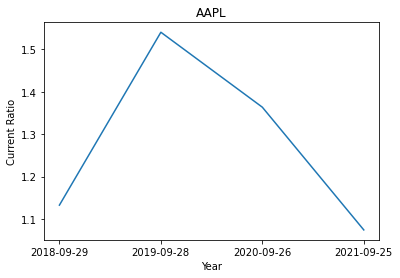

In [15]:
#STOCK PROFILE

#STOCK BASICS
print((ticker.upper()) + " STOCK PROFILE")
print(("Market Cap = ") + str(combined_stats["Recent"].loc[0]))
print(("Total Debt = ") + str(combined_extra_stats["Value"].loc[45]))
print("Beta of " + str(combined_extra_stats["Value"].loc[0]))
print("Profit Margin of " + str(combined_extra_stats["Value"].loc[31]))
print(("Forward P/E = ") + str(combined_stats["Recent"].loc[3]))
print(("Trailing P/E = ") + str(combined_stats["Recent"].loc[2]))
print(PE_Test)
print(("Price to Sales = ") + str(combined_stats["Recent"].loc[5]))
print(("Price to Book = ") + str(combined_stats["Recent"].loc[6]))
print("Trailing Dividend Yield = " + str(combined_extra_stats["Value"].loc[22]))
print("Payout Ratio = " + str(combined_extra_stats["Value"].loc[24]))
print(("Short Interest ") + str(combined_extra_stats["Value"].loc[16]) + (" of Float"))
print(str(combined_extra_stats["Value"].loc[13]) + " Held by Institutions")
print("")
print("Current Price = " + str(round(si.get_live_price(ticker),2)))
print("52 Week")
print(("High = ") + str(combined_extra_stats["Value"].loc[3]))
print(("Low = ") + str(combined_extra_stats["Value"].loc[4]))
print("")
print((("As of ") + col_4[0:10]))
print("Current ratio = " + str(combined_extra_stats["Value"].loc[47]))

#Graphing
x = col_1[0:10] , col_2[0:10],col_3[0:10], col_4[0:10]
y = (Year_4_CR, Year_3_CR, Year_2_CR, Year_1_CR)
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Current Ratio")
title_dummy = len(tickers_list)
plt.title(tickers_list[int(title_dummy)-1].upper())

#Growth Analysis
print("")
print("EBIT Analysis")
print(("EBIT = ") + (str(Year_1_EBIT/1000000)) + " million")
print(("EBIT has grown at ") + re.sub("[()]","", str(Average_EBIT_Growth)[0:7]) + "% per year since " + col_1[0:10])
print( ("Maximum one year EBIT growth = ") + str(round(Max_EBIT_Growth*100,2)) + ("% since ") + col_1[0:10])
print( ("Minimum one year EBIT growth = ") + str(round(Min_EBIT_Growth*100,2)) + ("% since ") + col_1[0:10])
print(("EBIT Growth Variance = ") + (str(round(EBIT_Variance,2))))
print("")
print("Gross Profit Analysis")
print(("Gross Profit = ") + (str(Year_1_GP/1000000)) + " million")
print(("Gross Profit has grown at ") + re.sub("[()]","", str(Average_GP_Growth)[0:7]) + "% per year since " + col_1[0:10])
print( ("Maximum one year Gross Profit growth = ") + str(round(Max_GP_Growth*100,2)) + ("% since ") + col_1[0:10])
print( ("Minimum one year Gross Profit growth = ") + str(round(Min_GP_Growth*100,2)) + ("% since ") + col_1[0:10])
print(("Gross Profit Growth Variance = ") + (str(round(GPS_Variance,2))))
print("")
print("Net Income Analysis")
print(("Net Income = ") + (str(Year_1_NI/1000000)) + " million")
print(("Net Income has grown at ") + re.sub("[()]","", str(Average_NI_Growth)[0:7]) + "% per year since " + col_1[0:10])
print( ("Maximum one year Net Income growth = ") + str(round(Max_NI_Growth*100,2)) + ("% since ") + col_1[0:10])
print( ("Minimum one year Net Income growth = ") + str(round(Min_NI_Growth*100,2)) + ("% since ") + col_1[0:10])
print(("Net Income Growth Variance = ") + (str(round(NIS_Variance,2))))
print("")